# < 서울과 대구의 공공체육시설에 관한 비교 >

## 전체 데이터 자료
- 서울 데이터 (공공체육시설, 19년 말)
- 대구 데이터 (공공체육시설, 19년 말)
- 서울+대구 데이터 (공공체육시설, 19년 말)
- 대구 추가 데이터(공공체육시설, 6개년(13년~19년))
- 인구 데이터(지역별 총인구 등, 4개년(17년~20년)
- 시트별 공통된 데이터 추출에 어려움이 있어 기타체육시설 일부는 누락되었음

## 자료 출처

- 대구광역시 공공체육시설(2019년말 기준)
: https://www.daegu.go.kr/cts/index.do?menu_id=00000870&menu_link=/icms/bbs/selectBoardArticle.do&bbsId=BBS_00153  

- 서울특별시 공공체육시설(2019년말 기준)
: http://data.seoul.go.kr/dataList/OA-1115/F/1/datasetView.do  

- 통계청 행정구역별 성별 인구수
: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1PB1607&vw_cd=MT_ZTITLE&list_id=A11_2015_1_10_30&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=MT_ZTITLE&path=%252FstatisticsList%252FstatisticsListIndex.do

In [562]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

# 파일 관련
DIR_PATH = '../Data/'

# 서울 데이터 파일명
FILE_NAME_01 = DIR_PATH+'sports_Seoul_2020.xlsx'

# 대구 데이터 파일명
FILE_NAME_02 = DIR_PATH+'sports_Daegu_2020.xlsx'

# 인구 데이터 파일명
FILE_NAME_03 = DIR_PATH+'census.xlsx'

# Matplotlib 한글 Font 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path = '../Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [563]:
# 데이터프레임 저장 - 서울 체육시설 현황(2020), 대구 체육시설 현황(2020)
sports_Seoul = pd.read_excel(FILE_NAME_01, sheet_name=None, skiprows=1)
sports_Daegu = pd.read_excel(FILE_NAME_02, sheet_name=None, skiprows=1)

# 엑셀파일 -> 시트가 20개 넘게 존재
# 각 시트의 이름이 key, 시트의 내용이 value인 딕셔너리
# sheet_name=None => 엑셀의 모든 시트를 불러들이는 것
# skiprows=1로 두었다 => 기존의 컬럼명을 날리고 아래 행을 위로 올려서 컬럼명으로 쓰기 위해서 (엑셀 화면 참고)

sports_Seoul

{'일반개요':                                            Unnamed: 0
 0    ㅇ 본 통계는 "체육시설의 설치ㆍ이용에 관한 법률" 제36조(시책 수립에 필요한 ...
 1                                                 NaN
 2                                         2. 체육시설의 정의
 3                                                 NaN
 4                                           가. 학문적 정의
 5       ㅇ 효과적이며 보다 쾌적하고 안전한 운동활동을 전제로 설치 관리되는 일정한 ...
 6         - 광의적 개념 : 운동에 필요한 물적인 여러가지 조건을 인공적으로 정비...
 7                          - 협의적 개념 : 운동학습을 위한 각종의 장소
 8                                                 NaN
 9                                            나. 법적 정의
 10      ㅇ 체육활동에 지속적으로 이용되는 시설과 그 부대시설(체육시설의 설치ㆍ이용에...
 11      ㅇ 건전한 신체ㆍ정신 함양과 여가 선용을 목적으로 운동경기ㆍ야외운동 등의 신...
 12        *  체육 : 운동경기ㆍ야외운동 등 신체활동을 통하여 건전한 신체와 정신...
 13                                                NaN
 14                                        3. 체육시설의 구분
 15                                                NaN
 16                                        가. 운동종목에 따라
 1

In [564]:
sports_Daegu       

{'표지':        Unnamed: 0
 0             NaN
 1             NaN
 2             NaN
 3             NaN
 4             NaN
 5             NaN
 6     (2019년말 기준)
 7             NaN
 8             NaN
 9             NaN
 10            NaN
 11            NaN
 12            NaN
 13            NaN
 14           2020
 15            NaN
 16            NaN
 17            NaN
 18            NaN
 19            NaN
 20  문 화 체 육 관 광 부,
 '일반개요':                                            Unnamed: 0
 0    ㅇ 본 통계는 "체육시설의 설치ㆍ이용에 관한 법률" 제36조(시책 수립에 필요한 ...
 1                                                 NaN
 2                                         2. 체육시설의 정의
 3                                                 NaN
 4                                           가. 학문적 정의
 5       ㅇ 효과적이며 보다 쾌적하고 안전한 운동활동을 전제로 설치 관리되는 일정한 ...
 6         - 광의적 개념 : 운동에 필요한 물적인 여러가지 조건을 인공적으로 정비...
 7                          - 협의적 개념 : 운동학습을 위한 각종의 장소
 8                                                 NaN
 9               

In [565]:
# 변수 정리
# sports_Seoul / sports_Daegu : 파일에 포함된 모든 시트를 불러온 DF
# Seoul_list_all / Daegu_list_all : 모든 시트의 이름을 뽑아서 리스트에 담은 것
# Seoul_list / Daegu_list: 정보를 뽑을 시트 이름만을 모아 놓은 리스트  (개요, 분류 기준등의 시트는 제외)
# target_col : 여러 시트에서 자료를 갖고 있는 공통된 컬럼명을 모아 놓은 리스트
#             -> 공문서라서 정해진 양식은 있는 듯 했으나, 조금씩 다른 부분들이 많아서 걸리는 부분 많네

In [566]:
Seoul_list_all = list(sports_Seoul.keys())
Daegu_list_all = list(sports_Daegu.keys())
# 각 시트가 어떤 곳의 정보인지 알기 위해 '시트명'을 뽑아낸 리스트 (위에서 언급했듯, 각 시트 이름이 key)

Seoul_list = Seoul_list_all[3:24]
Daegu_list = Daegu_list_all[6:27]
# 전체 리스트 중 자료를 뽑아낼 '시트명'을 리스트에 넣음
# 대구와 맞춰주기 위해 슬라이싱 조절

print(f'서울의\n {Seoul_list}\n\n대구의\n {Daegu_list}')

서울의
 ['육상경기장', '축구장', '하키장', '야구장', '싸이클경기장', '테니스장', '씨름장', '구기체육관', '투기체육관', '생활체육관', '게이트볼장', '수영장', '롤러스케이트장', '사격장', '국궁장', '양궁장', '승마장', '골프연습장', '조정카누장', '요트장', '빙상장']

대구의
 ['육상경기장', '축구장', '하키장', '야구장', '싸이클경기장', '테니스장', '씨름장', '구기체육관', '투기체육관', '생활체육관', '게이트볼장', '수영장', '롤러스케이트장', '사격장', '국궁장', '양궁장', '승마장', '골프연습장', '조정카누장', '요트장', '빙상장']


## 서울 데이터

In [567]:
target_col = ['시군구','시설명','소유기관','부지면적']
# 여러 시트에서 자료를 갖고 있는 공통된 컬럼명을 모아 놓은 리스트

In [568]:
# 데이터를 뽑고자 했던 시트들의 이름을 하나씩 빼서,
# 뽑고자 하는 데이터 컬럼명들(target_col)이 시트안에 동일하게 모두 들어가 있는지 확인하기 위한 것
# (20개 가량의 시트들의 양식을 수정을 할 수는 없었음, '준공연도'같은 경우, 시트4개를 수정했는데도 인식을 못함)

cols = []
for sheetName in Seoul_list:
    df = sports_Seoul[sheetName]
    cols.append(set(target_col).issubset(set(df.columns)))      # x.issubset(y) : set(target_col)가 set(df.columns)의 서브 set인가
                                                                # 즉, 속해 있는가를 물어보는 것 => 속하면 True
pd.DataFrame({
    'sheet name' : Seoul_list,   # 뽑고자 했던 시트명들을 모아 놓은 것
    'cols' : cols                # 결과값으로 나온 True/False들을 리스트에 모아 놓은 것
})                               # 모두 True => 내가 뽑아내고자 하는 target_col에 해당하는 내용들이 공통적으로 존재하는구나.

,sheet name,cols
0,육상경기장,True
1,축구장,True
2,하키장,True
3,야구장,True
4,싸이클경기장,True
5,테니스장,True
6,씨름장,True
7,구기체육관,True
8,투기체육관,True
9,생활체육관,True


In [569]:
# concat을 위한 제일 윗 컬럼만 있는 Series를 DF로 만듦

Seoul_data = sports_Seoul[Seoul_list[0]]          # Seoul_list[0] : 첫번째 시트(육상경기장)를 읽음
Seoul_data = Seoul_data[target_col]               # 해당 시트에서 target_col에 적혀 있는 내용들만 뽑아서 Seoul_data로 선언
df3 = pd.DataFrame(columns = Seoul_data.columns)  # Seoul_data로 넣었던 것을 컬럼명으로 하는 DF 생성

for spot in Seoul_list:                          # spot : 정보를 뽑을 시트를 하나씩 뽑아서 spot에 담음
    Seoul_data = sports_Seoul[spot]              # 시트를 읽음
    Seoul_data = Seoul_data[target_col]          # 읽은 DF 시트에서 필요한 컬럼넣어 데이터를 뽑아
    
    df3 = pd.concat([df3, Seoul_data])           # Seoul_list에 있는 각 장소별로 
                                                 # target_col에 있는 컬럼명들의 자료를 뽑아, 아래로 죽 붙인다 
                                                 # pd3제목 -> pd3제목+Seoul_Data -> pd3제목+Seoul_Data+Seoul_Data

In [570]:
df3

,시군구,시설명,소유기관,부지면적
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,소 계,3,NaN,249613.0
3,양천구,목동운동장,서울시,49327.0
4,송파구,잠실종합운동장,서울시,179386.0
...,...,...,...,...
1,NaN,NaN,NaN,NaN
2,소 계,3,NaN,34694.0
3,노원구,태릉선수촌 국제스케이트장,대한체육회,19223.0
4,노원구,태릉선수촌 실내빙상장,대한체육회,1495.0


In [571]:
df4 = df3.dropna(how='all')                      # df3의 모든 행이 NaN인 부분은 날리고 df4로 선언
df4

,시군구,시설명,소유기관,부지면적
2,소 계,3,NaN,249613.0
3,양천구,목동운동장,서울시,49327.0
4,송파구,잠실종합운동장,서울시,179386.0
5,송파구,잠실보조경기장,서울시,20900.0
2,소 계,73,NaN,1154917.0
...,...,...,...,...
35,광명시,서울 근로청소년복지관 골프연습장,서울시,25295.0
2,소 계,3,NaN,34694.0
3,노원구,태릉선수촌 국제스케이트장,대한체육회,19223.0
4,노원구,태릉선수촌 실내빙상장,대한체육회,1495.0


In [572]:
mask=[ isinstance(data, int) for data in df4['시설명'] ]    # df4의 '시설명' 컬럼에서의 데이터들이 int가 맞는지 확인하여
mask                                                        # True / False로 출력하여 

[True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fals

In [573]:
df4[mask]  # 시설별 소계와 부지면적만 뽑아냈음

,시군구,시설명,소유기관,부지면적
2,소 계,3,NaN,249613.0
2,소 계,73,NaN,1154917.0
2,소 계,1,NaN,309317.0
2,소 계,19,NaN,299994.0
1,소 계,65,NaN,392012.69
1,계,50,NaN,511815.4
1,소 계,3,NaN,16440.0
2,소 계,105,NaN,1110699.4
2,소 계,23,NaN,24418.0
2,소 계,97,NaN,728535.35


In [574]:
Seoul_list_2 = ['육상경기장', '축구장', '하키장', '야구장', '테니스장', '구기체육관', '투기체육관', '생활체육관', '게이트볼장', '수영장', '롤러스케이트장', '국궁장', '골프연습장', '빙상장']
list(Seoul_list_2)
# target_col에 있는 컬럼명들의 내용이 공통적으로 시트명들의 리스트를 담아둠 => 대구에서도 동일하게 쓰기 위함

df5 = df4[mask].drop(['시군구','소유기관'],axis=1).reset_index(drop = True)          # df4[mask]에서 해당 열을 삭제, 
                                                                                      # 인덱스를 리셋하되, 기존열을 남겨놓는다.
df5['종류'] = Seoul_list_2                                                            # df5에 열 추가

# df5 = df5.set_index('종류')
df5 = df5.rename({'시설명':'시설수(서울)', '부지면적':'부지면적(㎡,서울)'}, axis=1)
df5                                                                                   # 최종 뽑아낸 것

,시설수(서울),"부지면적(㎡,서울)",종류
0,3,249613.0,육상경기장
1,73,1154917.0,축구장
2,1,309317.0,하키장
3,19,299994.0,야구장
4,65,392012.69,테니스장
5,50,511815.4,구기체육관
6,3,16440.0,투기체육관
7,105,1110699.4,생활체육관
8,23,24418.0,게이트볼장
9,97,728535.35,수영장


## 대구 데이터

In [575]:
Daegu_list_2 = ['육상경기장', '축구장', '하키장', '야구장', '테니스장', '구기체육관', '투기체육관', '생활체육관', '게이트볼장', '수영장', '롤러스케이트장', '국궁장', '골프연습장', '빙상장']
# target_col에 있는 컬럼명들의 내용이 공통적으로 시트명들의 리스트를 담아둠

In [576]:
# 대구의 경우, 개소와 면적이 있는 시트가 있어서 거기서 바로 가져옴

aa = sports_Daegu[Daegu_list_all[5]]  # 시트를 읽어오고
aa

,Unnamed: 0,개소,면적,개소.1,면적.1,개소.2,면적.2,개소.3,면적.3,개소.4,면적.4,개소,면적.5,개소.5,면적.6,개소.6,면적.7,개소.7,면적.8
0,합 계,30199,198101817.17,3005,15225983.34,1425,5372216.7,806,4690356,1130,9799670.1,990,1978509.3,508,2292673.15,318,3103140.42,124,603381
1,1. 육상경기장,252,20447702.96,3,249613,3,144597,5,708147,4,1064010,2,470278,3,157777,5,259532,NaN,NaN
2,2. 축구장,1041,31123694.59,74,1163412,34,515424,32,585750,30,959738,22,294797,13,447793.2,26,1596621.32,7,65910
3,3. 하키장,16,1014414,1,309317,1,18310,1,50760,2,255935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4. 야구장,309,9610609.1,19,299994,11,402148,14,514896,6,762434.5,6,174418,3,18043,2,67961,4,51845
5,5. 싸이클경기장,11,492640,1,10672,1,31861,1,46972,1,59356,NaN,NaN,1,59499,NaN,NaN,NaN,NaN
6,6. 테니스장,818,8274015.93,66,396057.69,33,281863.08,28,429924,35,561963.2,20,101018,9,194841,15,189241,8,105438
7,7. 씨름장,71,224674.3,NaN,NaN,1,3471,2,8073,1,6188,1,0,1,354.9,1,915,,NaN
8,8. 간이운동장\n (마을체육시설),22874,60015081,2476,9731855,1174,2491348,621,963422,909,2373578,847,306932,409,366023,204,402758,47,51190
9,9. 체육관,1140,25371829.02,146,1517431.8,34,492729,27,311493,34,1417153.3,23,167362.3,20,298905.7,16,251792.4,17,140619


In [577]:
cc = aa[['Unnamed: 0','개소.3','면적.3']]                        # 서울과 비교를 위한 열을 따로 떼어냄
cc = cc.iloc[0:24]                                               # 필요한 행만
cc = cc.drop([0,5,7,8,9,16,18,19,21,22])                         # 서울과 비교를 위해 불필요한 열 삭제
                                                                 # -> 싸이클(1), 씨름장(2), 양궁장(2), 승마장(3) + 내용없는 시트 
cc = cc.drop(['Unnamed: 0'], axis=1)

cc['종류'] = Daegu_list_2
# cc = cc.set_index('종류')
cc = cc.rename({'개소.3':'시설수(대구)', '면적.3':'부지면적(㎡,대구)'}, axis=1)

cc = cc.fillna(0)
cc

,시설수(대구),"부지면적(㎡,대구)",종류
1,5,708147,육상경기장
2,32,585750,축구장
3,1,50760,하키장
4,14,514896,야구장
6,28,429924,테니스장
10,4,30683,구기체육관
11,4,5725,투기체육관
12,19,275085,생활체육관
13,3,21581,게이트볼장
14,16,213236,수영장


## 서울 + 대구 데이터

In [578]:
S_D_merge = pd.merge(df5,cc)
S_D_merge = S_D_merge.set_index('종류')
# 족구장, 암벽장 등의 기타체육 시설은 제외

sum1 = S_D_merge['시설수(서울)'].sum()
sum2 = S_D_merge['부지면적(㎡,서울)'].sum()
sum3 = S_D_merge['시설수(대구)'].sum()
sum4 = S_D_merge['부지면적(㎡,대구)'].sum()

S_D_merge
# 골프연습장의 분류기준 : 골프 연습 타석을 갖춘 시설 => 대구는 0건, 분류 기준에 부합해야 카운팅 되는 듯

,시설수(서울),"부지면적(㎡,서울)",시설수(대구),"부지면적(㎡,대구)"
종류,,,,
육상경기장,3,249613.0,5,708147
축구장,73,1154917.0,32,585750
하키장,1,309317.0,1,50760
야구장,19,299994.0,14,514896
테니스장,65,392012.69,28,429924
구기체육관,50,511815.4,4,30683
투기체육관,3,16440.0,4,5725
생활체육관,105,1110699.4,19,275085
게이트볼장,23,24418.0,3,21581


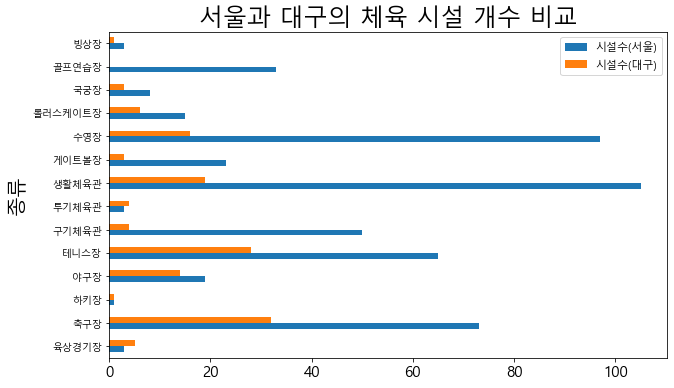

In [579]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

S_D_merge[['시설수(서울)','시설수(대구)']].plot.barh(ax=ax)

plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=18)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=12)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=10)  # 범례 폰트 크기
plt.rc('figure', titlesize=15) # figure title 폰트 크기

plt.ylabel('종류')
plt.title('서울과 대구의 체육 시설 개수 비교')

plt.show()

### 분석 1)

- 서울보다 대구의 종류별 체육시설 개수가 대부분 많다.
- 마찬가지로 체육시설들의 부지면적 또한 서울이 많다.

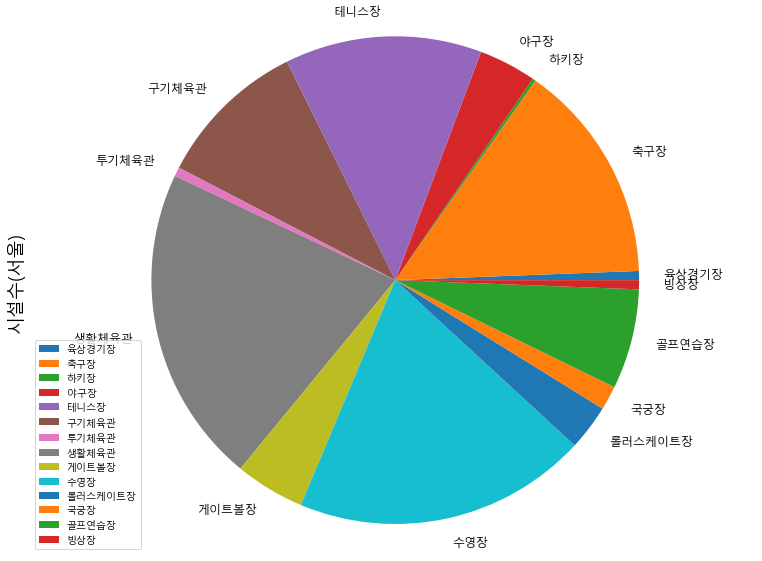

In [580]:
fig = plt.figure(figsize=(13,10))

S_D_merge['시설수(서울)'].plot.pie()
plt.axis('equal')   # 더 동글
plt.legend(loc='lower left')
plt.rc('legend', fontsize=11)

plt.show()

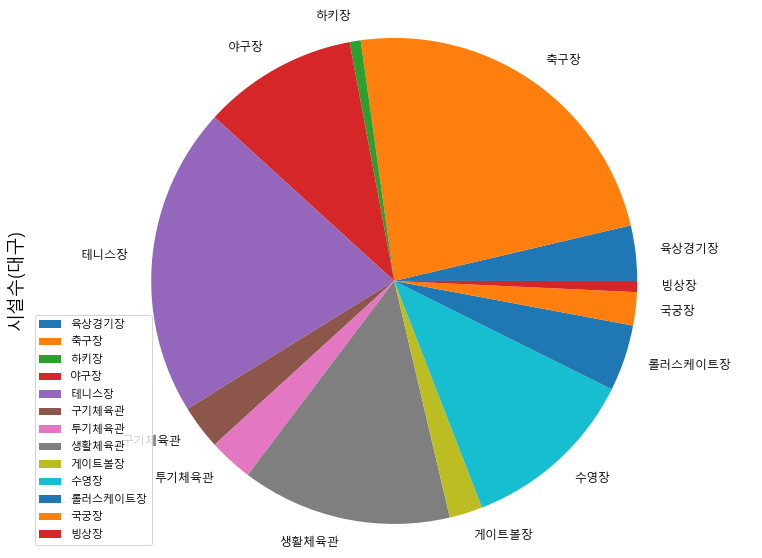

In [581]:
fig = plt.figure(figsize=(13,10))

S_D_merge['시설수(대구)'].plot.pie()
plt.axis('equal')
plt.legend(loc='lower left')
plt.rc('legend', fontsize=11)
plt.show()

### 분석 2)

- 시설 종류별 구성을 보면 
- 공통적으로 비교적 규모가 커야하는 축구장, 테니스장, 수영장, 골프연습장 등의 비율이 큰 것으로 확인 되었음.

- 서울의 경우, 생활체육관의 상당부분 차지하고 있는 것으로 봐서는 시민들의 생활체육 참여가 많이 이루어진다고 생각된다.
- 반면, 대구의 경우, 전체적인 시설에서 생활체육관의 비중이 상대적으로 적어 참여정도가 적거나 공급이 제대로 이루어 지지 않을 수도 있다고 생각된다.

In [582]:
# 서울 총 면적 : 605.2km²
# 대구 총 면적 : 883.5km²
# 1 제곱킬로미터 [km²] = 1 000 000 제곱미터 [m²] 
# 1 제곱미터 [m²] = 0.000 001 제곱킬로미터 [km²]
# 6.052 ×108 제곱미터 [m²]605,200,000,000   => 소수점 엄청 낮게
# 8.835 ×108 제곱미터 [m²]88,350,000,000    => 0.00586%
# 체육시설 정도라 지역 총 면적과의 비율은 유의미x

## 대구 추가 데이터

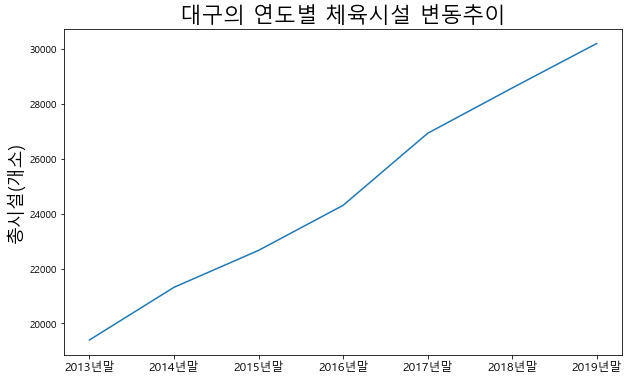

In [584]:
Daegu_facilities_time = sports_Daegu[Daegu_list_all[3]]
Daegu_facilities_time = Daegu_facilities_time.drop(27)
# Daegu_facilities_time.drop([0,5,7,8,9,16,18,19,21,22])  # 굳이 똑같이 없애지 않음, 증감 추이만 보려는 것이기 때문에
Daegu_facilities_time

Daegu_facilities_time = Daegu_facilities_time.set_index('시설항목')
Daegu_facilities_time = Daegu_facilities_time[Daegu_facilities_time.columns[1::2]]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

Daegu_facilities_time.loc['합계'].plot()


plt.rc('font', size=18)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
# plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
# plt.rc('legend', fontsize=18)  # 범례 폰트 크기
plt.rc('figure', titlesize=13) # figure title 폰트 크기

plt.ylabel('총시설(개소)')
plt.title('대구의 연도별 체육시설 변동추이')

plt.show()

### 분석 3)

- 하지만, 체육시설 변동추이를 봤을 때, 13년말부터 19년말까지는 지속적으로 증가하는 추세에 있으므로,
- 2022년 현재 비중이 어떻게 달라졌는지는 추가적인 조사가 필요해 보인다.

## 인구 데이터

In [585]:
# 데이터프레임 저장
census = pd.read_excel(FILE_NAME_03)
census

,행정구역별(읍면동),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,...,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9
0,행정구역별(읍면동),총인구 (명),남자 (명),여자 (명),내국인-계 (명),내국인-남자 (명),내국인-여자 (명),외국인-계 (명),외국인-남자 (명),외국인-여자 (명),...,총인구 (명),남자 (명),여자 (명),내국인-계 (명),내국인-남자 (명),내국인-여자 (명),외국인-계 (명),외국인-남자 (명),외국인-여자 (명),가구-계 (가구)
1,서울특별시,9741871,4757642,4984229,9397944,4592393,4805551,343927,165249,178678,...,9586195,4647733,4938462,9219741,4474343,4745398,366454,173390,193064,4126524
2,종로구,157277,76670,80607,146298,71757,74541,10979,4913,6066,...,151291,73062,78229,139718,67919,71799,11573,5143,6430,68069
3,중구,127896,62195,65701,117631,57391,60240,10265,4804,5461,...,128744,62147,66597,117252,56725,60527,11492,5422,6070,59817
4,용산구,223898,108471,115427,207893,99759,108134,16005,8712,7293,...,225882,109162,116720,208602,99866,108736,17280,9296,7984,101431
5,성동구,302367,149060,153307,291931,144018,147913,10436,5042,5394,...,291918,142128,149790,281266,137301,143965,10652,4827,5825,126658
6,광진구,363934,177156,186778,345535,168833,176702,18399,8323,10076,...,353967,169925,184042,333985,161130,172855,19982,8795,11187,160944
7,동대문구,357380,176460,180920,339438,168977,170461,17942,7483,10459,...,351057,171484,179573,331833,163507,168326,19224,7977,11247,158899
8,중랑구,396892,196346,200546,390879,193871,197008,6013,2475,3538,...,385663,189537,196126,378258,186593,191665,7405,2944,4461,167617
9,성북구,445417,215068,230349,432226,209374,222852,13191,5694,7497,...,438833,209682,229151,425295,204207,221088,13538,5475,8063,184871


In [586]:
region = census[census.columns[0]]
region

0     행정구역별(읍면동)
1          서울특별시
2         　　　종로구
3          　　　중구
4         　　　용산구
5         　　　성동구
6         　　　광진구
7        　　　동대문구
8         　　　중랑구
9         　　　성북구
10        　　　강북구
11        　　　도봉구
12        　　　노원구
13        　　　은평구
14       　　　서대문구
15        　　　마포구
16        　　　양천구
17        　　　강서구
18        　　　구로구
19        　　　금천구
20       　　　영등포구
21        　　　동작구
22        　　　관악구
23        　　　서초구
24        　　　강남구
25        　　　송파구
26        　　　강동구
27         대구광역시
28         　　　중구
29         　　　동구
30         　　　서구
31         　　　남구
32         　　　북구
33        　　　수성구
34        　　　달서구
35        　　　달성군
Name: 행정구역별(읍면동), dtype: object

In [587]:
# 필요한 컬럼만 뽑아서 인구 통계치 뽑기
census_total = census[census.columns[[1,2,3,11,12,13,21,22,23,31,32,33]]]
census_total.insert(0, '지역', region)
census_total

,지역,2017,2017.1,2017.2,2018,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2
0,행정구역별(읍면동),총인구 (명),남자 (명),여자 (명),총인구 (명),남자 (명),여자 (명),총인구 (명),남자 (명),여자 (명),총인구 (명),남자 (명),여자 (명)
1,서울특별시,9741871,4757642,4984229,9673936,4718972,4954964,9639541,4690440,4949101,9586195,4647733,4938462
2,종로구,157277,76670,80607,157967,77147,80820,154969,74880,80089,151291,73062,78229
3,중구,127896,62195,65701,129797,62975,66822,130957,63406,67551,128744,62147,66597
4,용산구,223898,108471,115427,226938,110685,116253,227181,110934,116247,225882,109162,116720
5,성동구,302367,149060,153307,306796,150623,156173,299688,146630,153058,291918,142128,149790
6,광진구,363934,177156,186778,362304,175762,186542,359766,174027,185739,353967,169925,184042
7,동대문구,357380,176460,180920,358141,176323,181818,355094,174161,180933,351057,171484,179573
8,중랑구,396892,196346,200546,391668,193599,198069,386331,190531,195800,385663,189537,196126
9,성북구,445417,215068,230349,438734,211204,227530,445327,213832,231495,438833,209682,229151


In [588]:
# 서울특별시, 대구광역시의 총 합계만 있는 행만 따로 빼기
census_total_F = census_total.iloc[[0,1,27]].set_index('지역')
census_total_F

,2017,2017.1,2017.2,2018,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2
지역,,,,,,,,,,,,
행정구역별(읍면동),총인구 (명),남자 (명),여자 (명),총인구 (명),남자 (명),여자 (명),총인구 (명),남자 (명),여자 (명),총인구 (명),남자 (명),여자 (명)
서울특별시,9741871,4757642,4984229,9673936,4718972,4954964,9639541,4690440,4949101,9586195,4647733,4938462
대구광역시,2453041,1218326,1234715,2444412,1212777,1231635,2429940,1203754,1226186,2410700,1190271,1220429


In [589]:
# 합계 행 추가
S_D_merge.loc['합계'] = [sum1, sum2, sum3, sum4]
S_D_merge

,시설수(서울),"부지면적(㎡,서울)",시설수(대구),"부지면적(㎡,대구)"
종류,,,,
육상경기장,3,249613.0,5.0,708147.0
축구장,73,1154917.0,32.0,585750.0
하키장,1,309317.0,1.0,50760.0
야구장,19,299994.0,14.0,514896.0
테니스장,65,392012.69,28.0,429924.0
구기체육관,50,511815.4,4.0,30683.0
투기체육관,3,16440.0,4.0,5725.0
생활체육관,105,1110699.4,19.0,275085.0
게이트볼장,23,24418.0,3.0,21581.0


In [590]:
# 10만명 당 비율을 위해 수치 계산을 해서 컬럼 추가
a = 49800000 / 9586195
b = 13600000 / 2410700

graph1 = census_total_F[census_total_F.columns[::3]]
graph1['10만명당 비율 (2020)'] = ['총시설/총인구(10만명당)',a,b]

C:\Users\ahasu\AppData\Local\Temp\ipykernel_13112\3175457141.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph1['10만명당 비율 (2020)'] = ['총시설/총인구(10만명당)',a,b]


In [591]:
graph1

,2017,2018,2019,2020,10만명당 비율 (2020)
지역,,,,,
행정구역별(읍면동),총인구 (명),총인구 (명),총인구 (명),총인구 (명),총시설/총인구(10만명당)
서울특별시,9741871,9673936,9639541,9586195,5.19497
대구광역시,2453041,2444412,2429940,2410700,5.641515


### 분석 4)

- 인구 10만명당 시설의 개수 수치를 보면 근소하게 대구광역시가 조금 더 앞서는 것으로 보아,
- 체육시설 전체의 공급된 상태는 비슷하다고 판단된다.

## 결론

- 상대적으로 체육 시설 전체의 10만명당 공급 상황은 비슷하다고 할 수 있으나,
- 대구의 경우, 축구장, 테니스장, 수영장 등 비교적 장기간 취미로 즐겨왔던 종목들 비중이 크고
- 생활체육 시설의 비중이 적다고 할 수 있었다.
- 따라서 다양한 연령대의 사람들이 여러 가지 체육시설을 이용하는 진입의 편리성을 확보하여,
- 보다 많은 시민들의 체육시설 이용에 대한 수요를 만족시킴으로써 문화체육 전반의 인식 개선을 위해서는 
- '생활체육시설'에 대한 공급의 비중을 높이는 방향이 바람직할 것으로 판단됩니다.